<a href="https://colab.research.google.com/github/zeafang/Predictive-analysis/blob/main/Ziyi_ISE_529_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Prepare the data:

## a) Import the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## b)Load the dataset

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Social_Network_Ads_Classification.csv to Social_Network_Ads_Classification.csv


In [ ]:
dataset=pd.read_csv("Social_Network_Ads_Classification.csv")
#Check the dataset
print(dataset.head())
#Split columns into independent variable x and dependent variable y
X= dataset.iloc[:,:-1].values
y= dataset.iloc[:,-1].values

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0


## c) Split the train set and the test set, with random state=0,test_size=0.2

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## d) Apply feature scaling (standard scaler)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Train the models & Evaluate the model and Visualization

## a) Use train set as the input of GridSearchCV to find the best parameters  
## b) Use each model with the best parameters to predict the test set


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

## i) logistic Regression Classifier

In [361]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression() # Define logistic regression model
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2']} # Define parameter grid
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy') # Initialize GridSearchCV
grid_search.fit(X_train, y_train) # Perform grid search

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'C': 1, 'penalty': 'l2'}
Best Score: 0.83125


In [362]:
# Make predictions with the best model
best_log_reg = grid_search.best_estimator_
y_pred = best_log_reg.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.925


In [363]:
# Import confusion matrix
from sklearn.metrics import confusion_matrix

In [364]:
# Make predictions on the training data
y_train_pred = best_log_reg.predict(X_train)

# Calculate confusion matrix for training data
cm_train = confusion_matrix(y_train, y_train_pred)
print("confusion matrix for training data:")
print(cm_train)

# Calculate confusion matrix for testing data
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix for testing data:")
print(cm)

confusion matrix for training data:
[[181  18]
 [ 39  82]]
confusion matrix for testing data:
[[57  1]
 [ 5 17]]


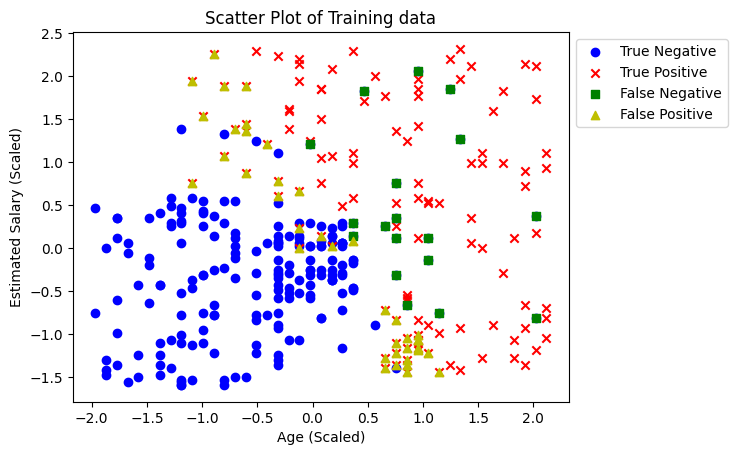

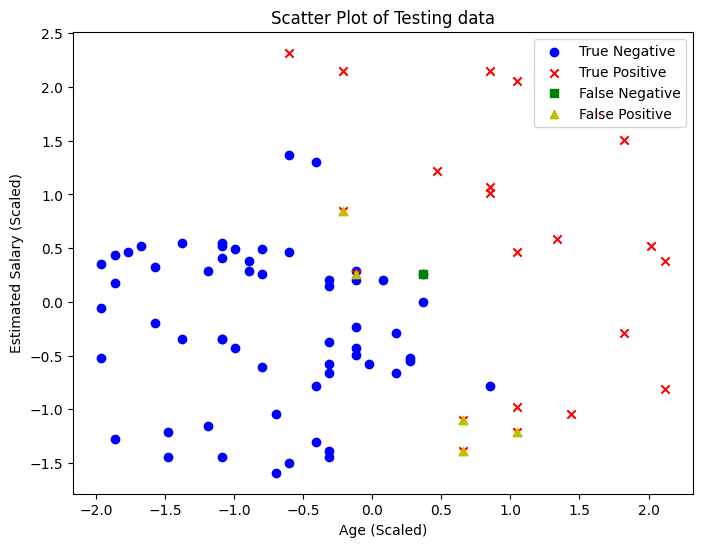

In [365]:
# Scatter plot for training data
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='b', marker='o', label='True Negative')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='r', marker='x', label='True Positive')
plt.scatter(X_train[(y_train != y_train_pred) & (y_train == 0)][:, 0], X_train[(y_train != y_train_pred) & (y_train == 0)][:, 1], c='g', marker='s', label='False Negative')
plt.scatter(X_train[(y_train != y_train_pred) & (y_train == 1)][:, 0], X_train[(y_train != y_train_pred) & (y_train == 1)][:, 1], c='y', marker='^', label='False Positive')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Age (Scaled)')
plt.ylabel('Estimated Salary (Scaled)')
plt.title('Scatter Plot of Training data')

# Show plot
plt.show()

# Define labels for confusion matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Show plot
plt.show()

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], c='b', marker='o', label='True Negative')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], c='r', marker='x', label='True Positive')
plt.scatter(X_test[(y_test != y_pred) & (y_test == 0)][:, 0], X_test[(y_test != y_pred) & (y_test == 0)][:, 1], c='g', marker='s', label='False Negative')
plt.scatter(X_test[(y_test != y_pred) & (y_test == 1)][:, 0], X_test[(y_test != y_pred) & (y_test == 1)][:, 1], c='y', marker='^', label='False Positive')

plt.title('Scatter Plot of Testing data')
plt.xlabel('Age (Scaled)')
plt.ylabel('Estimated Salary (Scaled)')
plt.legend(loc='upper right')

# Show plot
plt.show()


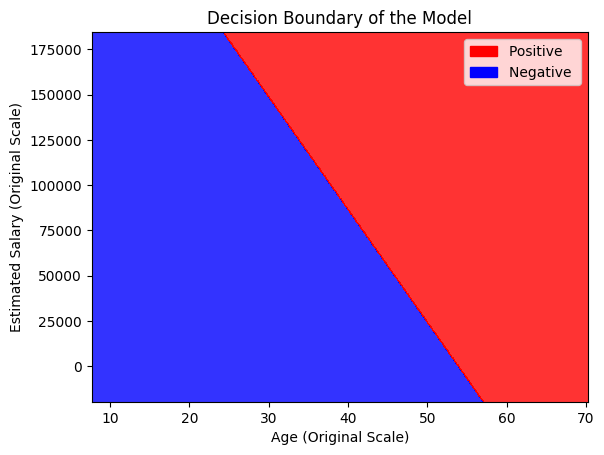

In [366]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler
import matplotlib.patches as mpatches

# Select the first two features for visualization
X_vis = X_train[:, :2]

# Define meshgrid range
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class labels for all points in the meshgrid
Z = best_log_reg.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predicted values to match the meshgrid shape
Z = Z.reshape(xx.shape)

# Apply inverse scaling to meshgrid points
xx_inv = sc.inverse_transform(np.c_[xx.ravel(), np.zeros_like(xx.ravel())])[:, 0].reshape(xx.shape)
yy_inv = sc.inverse_transform(np.c_[np.zeros_like(yy.ravel()), yy.ravel()])[:, 1].reshape(yy.shape)

# Inverse scaling to training data points
X_vis_inv = sc.inverse_transform(X_vis)

# Define custom colormap with discrete colors for blue and red
custom_cmap = ListedColormap(['blue', 'red'])

# Plot contour plot with custom colormap
plt.contourf(xx_inv, yy_inv, Z, alpha=0.8, cmap=custom_cmap)

# Plot data points with original scale after inverse scaling
# plt.scatter(X_vis_inv[y_train == 0, 0], X_vis_inv[y_train == 0, 1], c='blue', label="Negative", s=20, edgecolors='k')
# plt.scatter(X_vis_inv[y_train == 1, 0], X_vis_inv[y_train == 1, 1], c='red', label="Positive", s=20, edgecolors='k')


# Set x and y limits according to the reversed scale
plt.xlim(xx_inv.min(), xx_inv.max())
plt.ylim(yy_inv.min(), yy_inv.max())

# Add legend for colormap areas
patch1 = mpatches.Patch(color='blue', label='Negative ')
patch2 = mpatches.Patch(color='red', label='Positive ')
plt.legend(handles=[patch2, patch1], loc='upper right')

plt.xlabel('Age (Original Scale)')
plt.ylabel('Estimated Salary (Original Scale)')
plt.title('Decision Boundary of the Model')
# plt.legend(loc='upper right')
plt.show()

## ii) KNN (kneighborsClassifier)


In [367]:
# Import necessary library
from sklearn.neighbors import KNeighborsClassifier

# Define parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}

# Initialize KNN model
kn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=kn, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'n_neighbors': 5, 'weights': 'distance'}
Best Score: 0.90625


In [368]:
# Make predictions with the best model
best_kn = grid_search.best_estimator_
y_pred = best_kn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.95


In [369]:
# Make predictions on the training data
y_train_pred = best_kn.predict(X_train)

# Calculate confusion matrix for training data
cm_train = confusion_matrix(y_train, y_train_pred)
print("confusion matrix for training data:")
print(cm_train)

# Calculate confusion matrix for testing data
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix for testing data:")
print(cm)

confusion matrix for training data:
[[199   0]
 [  1 120]]
confusion matrix for testing data:
[[55  3]
 [ 1 21]]


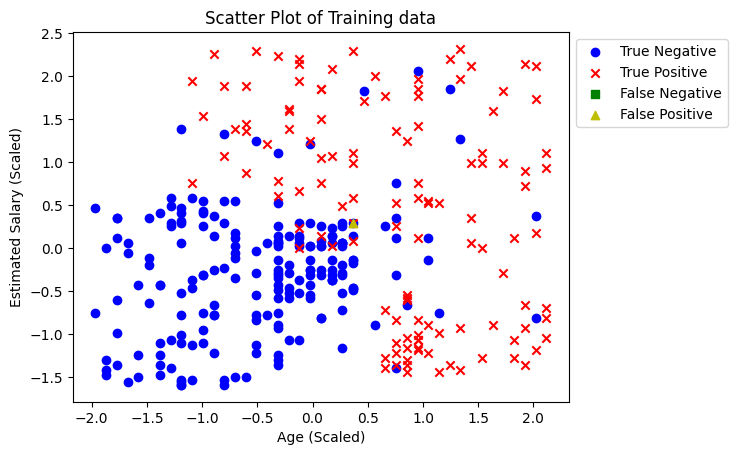

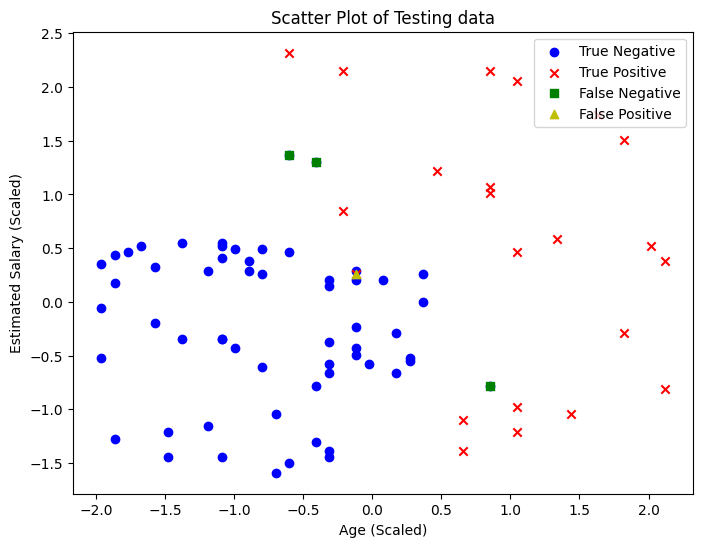

In [370]:
# Scatter plot for training data
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='b', marker='o', label='True Negative')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='r', marker='x', label='True Positive')
plt.scatter(X_train[(y_train != y_train_pred) & (y_train == 0)][:, 0], X_train[(y_train != y_train_pred) & (y_train == 0)][:, 1], c='g', marker='s', label='False Negative')
plt.scatter(X_train[(y_train != y_train_pred) & (y_train == 1)][:, 0], X_train[(y_train != y_train_pred) & (y_train == 1)][:, 1], c='y', marker='^', label='False Positive')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Age (Scaled)')
plt.ylabel('Estimated Salary (Scaled)')
plt.title('Scatter Plot of Training data')

# Show plot
plt.show()

# Define labels for confusion matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Show plot
plt.show()

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], c='b', marker='o', label='True Negative')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], c='r', marker='x', label='True Positive')
plt.scatter(X_test[(y_test != y_pred) & (y_test == 0)][:, 0], X_test[(y_test != y_pred) & (y_test == 0)][:, 1], c='g', marker='s', label='False Negative')
plt.scatter(X_test[(y_test != y_pred) & (y_test == 1)][:, 0], X_test[(y_test != y_pred) & (y_test == 1)][:, 1], c='y', marker='^', label='False Positive')

plt.title('Scatter Plot of Testing data')
plt.xlabel('Age (Scaled)')
plt.ylabel('Estimated Salary (Scaled)')
plt.legend(loc='upper right')

# Show plot
plt.show()


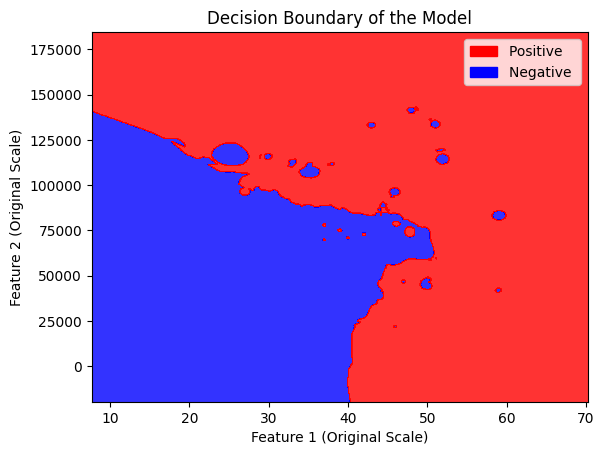

In [371]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler
import matplotlib.patches as mpatches

# Select the first two features for visualization
X_vis = X_train[:, :2]

# Define meshgrid range
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class labels for all points in the meshgrid
Z = best_kn.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predicted values to match the meshgrid shape
Z = Z.reshape(xx.shape)

# Apply inverse scaling to meshgrid points
xx_inv = sc.inverse_transform(np.c_[xx.ravel(), np.zeros_like(xx.ravel())])[:, 0].reshape(xx.shape)
yy_inv = sc.inverse_transform(np.c_[np.zeros_like(yy.ravel()), yy.ravel()])[:, 1].reshape(yy.shape)

# Inverse scaling to training data points
X_vis_inv = sc.inverse_transform(X_vis)

# Define custom colormap with discrete colors for blue and red
custom_cmap = ListedColormap(['blue', 'red'])

# Plot contour plot with custom colormap
plt.contourf(xx_inv, yy_inv, Z, alpha=0.8, cmap=custom_cmap)

# Plot data points with original scale after inverse scaling
# plt.scatter(X_vis_inv[y_train == 0, 0], X_vis_inv[y_train == 0, 1], c='blue', label="Negative", s=20, edgecolors='k')
# plt.scatter(X_vis_inv[y_train == 1, 0], X_vis_inv[y_train == 1, 1], c='red', label="Positive", s=20, edgecolors='k')


# Set x and y limits according to the reversed scale
plt.xlim(xx_inv.min(), xx_inv.max())
plt.ylim(yy_inv.min(), yy_inv.max())

# Add legend for colormap areas
patch1 = mpatches.Patch(color='blue', label='Negative ')
patch2 = mpatches.Patch(color='red', label='Positive ')
plt.legend(handles=[patch2, patch1], loc='upper right')

plt.xlabel('Feature 1 (Original Scale)')
plt.ylabel('Feature 2 (Original Scale)')
plt.title('Decision Boundary of the Model')
# plt.legend(loc='upper right')
plt.show()

## ii) SVC


In [372]:
# Import necessary library
from sklearn.svm import LinearSVC

# Define parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'max_iter': [100000]} # increase the maximum iteration to allow the model to converge

# Initialize LinearSVC model
lsvc= LinearSVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lsvc, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)




Best Parameters: {'C': 0.01, 'max_iter': 100000}
Best Score: 0.825


In [373]:
# Make predictions with the best model
best_lsvc = grid_search.best_estimator_
y_pred = best_lsvc.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.925


In [374]:
# Make predictions on the training data
y_train_pred = best_lsvc.predict(X_train)

# Calculate confusion matrix for training data
cm_train = confusion_matrix(y_train, y_train_pred)
print("confusion matrix for training data:")
print(cm_train)

# Calculate confusion matrix for testing data
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix for testing data:")
print(cm)

confusion matrix for training data:
[[182  17]
 [ 39  82]]
confusion matrix for testing data:
[[57  1]
 [ 5 17]]


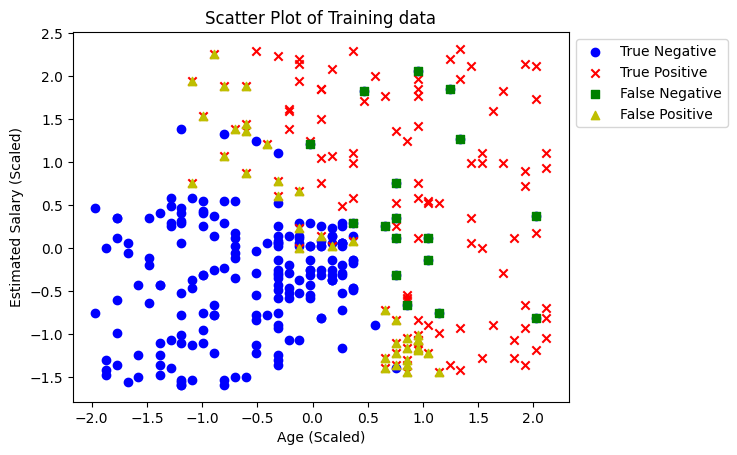

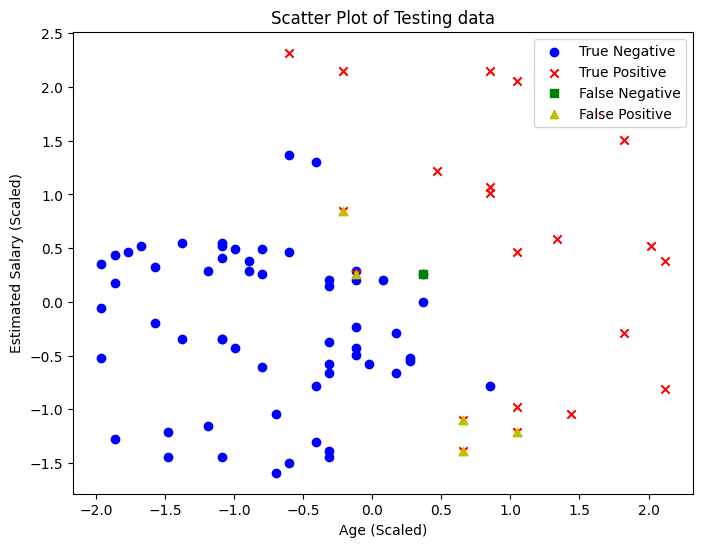

In [375]:
# Scatter plot for training data
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='b', marker='o', label='True Negative')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='r', marker='x', label='True Positive')
plt.scatter(X_train[(y_train != y_train_pred) & (y_train == 0)][:, 0], X_train[(y_train != y_train_pred) & (y_train == 0)][:, 1], c='g', marker='s', label='False Negative')
plt.scatter(X_train[(y_train != y_train_pred) & (y_train == 1)][:, 0], X_train[(y_train != y_train_pred) & (y_train == 1)][:, 1], c='y', marker='^', label='False Positive')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Age (Scaled)')
plt.ylabel('Estimated Salary (Scaled)')
plt.title('Scatter Plot of Training data')

# Show plot
plt.show()

# Define labels for confusion matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Show plot
plt.show()

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], c='b', marker='o', label='True Negative')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], c='r', marker='x', label='True Positive')
plt.scatter(X_test[(y_test != y_pred) & (y_test == 0)][:, 0], X_test[(y_test != y_pred) & (y_test == 0)][:, 1], c='g', marker='s', label='False Negative')
plt.scatter(X_test[(y_test != y_pred) & (y_test == 1)][:, 0], X_test[(y_test != y_pred) & (y_test == 1)][:, 1], c='y', marker='^', label='False Positive')

plt.title('Scatter Plot of Testing data')
plt.xlabel('Age (Scaled)')
plt.ylabel('Estimated Salary (Scaled)')
plt.legend(loc='upper right')

# Show plot
plt.show()


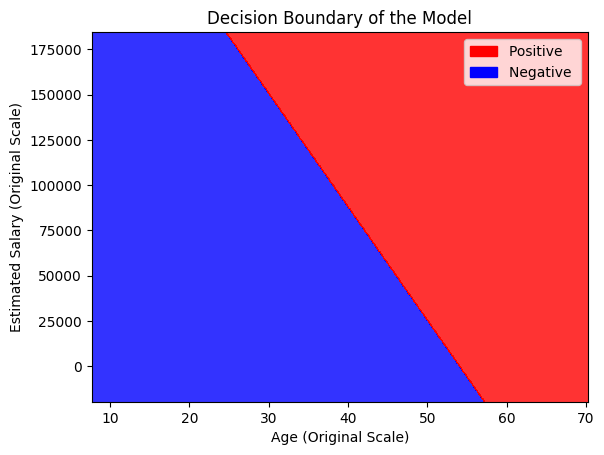

In [376]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler
import matplotlib.patches as mpatches

# Select the first two features for visualization
X_vis = X_train[:, :2]

# Define meshgrid range
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class labels for all points in the meshgrid
Z = best_lsvc.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predicted values to match the meshgrid shape
Z = Z.reshape(xx.shape)

# Apply inverse scaling to meshgrid points
xx_inv = sc.inverse_transform(np.c_[xx.ravel(), np.zeros_like(xx.ravel())])[:, 0].reshape(xx.shape)
yy_inv = sc.inverse_transform(np.c_[np.zeros_like(yy.ravel()), yy.ravel()])[:, 1].reshape(yy.shape)

# Inverse scaling to training data points
X_vis_inv = sc.inverse_transform(X_vis)

# Define custom colormap with discrete colors for blue and red
custom_cmap = ListedColormap(['blue', 'red'])

# Plot contour plot with custom colormap
plt.contourf(xx_inv, yy_inv, Z, alpha=0.8, cmap=custom_cmap)

# Plot data points with original scale after inverse scaling
# plt.scatter(X_vis_inv[y_train == 0, 0], X_vis_inv[y_train == 0, 1], c='blue', label="Negative", s=20, edgecolors='k')
# plt.scatter(X_vis_inv[y_train == 1, 0], X_vis_inv[y_train == 1, 1], c='red', label="Positive", s=20, edgecolors='k')


# Set x and y limits according to the reversed scale
plt.xlim(xx_inv.min(), xx_inv.max())
plt.ylim(yy_inv.min(), yy_inv.max())

# Add legend for colormap areas
patch1 = mpatches.Patch(color='blue', label='Negative ')
patch2 = mpatches.Patch(color='red', label='Positive ')
plt.legend(handles=[patch2, patch1], loc='upper right')

plt.xlabel('Age (Original Scale)')
plt.ylabel('Estimated Salary (Original Scale)')
plt.title('Decision Boundary of the Model')
# plt.legend(loc='upper right')
plt.show()

## ii) Kernal SVC


In [377]:
# Import necessary library
from sklearn.svm import SVC

# Define parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize Kernal SVC model
svc=SVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)




Best Parameters: {'C': 10}
Best Score: 0.9


In [378]:
# Make predictions with the best model
best_svc = grid_search.best_estimator_
y_pred = best_svc.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.95


In [379]:
# Make predictions on the training data
y_train_pred = best_svc.predict(X_train)

# Calculate confusion matrix for training data
cm_train = confusion_matrix(y_train, y_train_pred)
print("confusion matrix for training data:")
print(cm_train)

# Calculate confusion matrix for testing data
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix for testing data:")
print(cm)

confusion matrix for training data:
[[178  21]
 [  8 113]]
confusion matrix for testing data:
[[55  3]
 [ 1 21]]


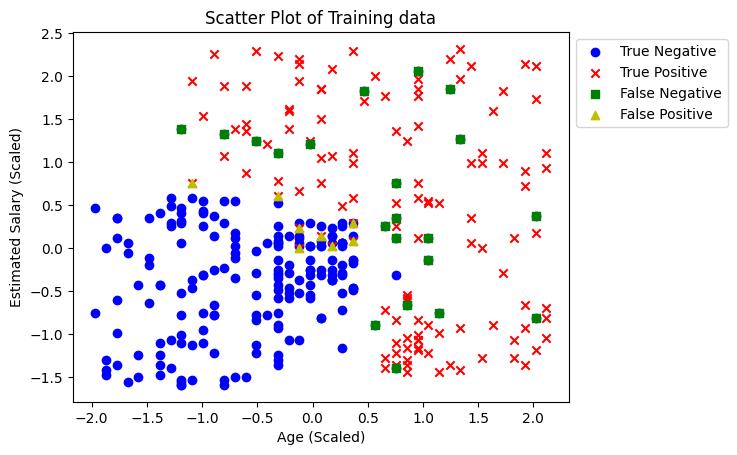

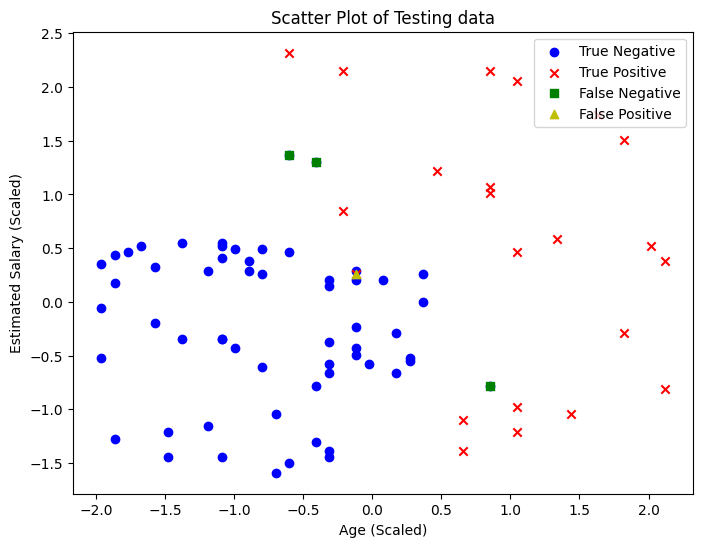

In [380]:
# Scatter plot for training data
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='b', marker='o', label='True Negative')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='r', marker='x', label='True Positive')
plt.scatter(X_train[(y_train != y_train_pred) & (y_train == 0)][:, 0], X_train[(y_train != y_train_pred) & (y_train == 0)][:, 1], c='g', marker='s', label='False Negative')
plt.scatter(X_train[(y_train != y_train_pred) & (y_train == 1)][:, 0], X_train[(y_train != y_train_pred) & (y_train == 1)][:, 1], c='y', marker='^', label='False Positive')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Age (Scaled)')
plt.ylabel('Estimated Salary (Scaled)')
plt.title('Scatter Plot of Training data')

# Show plot
plt.show()

# Define labels for confusion matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Show plot
plt.show()

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], c='b', marker='o', label='True Negative')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], c='r', marker='x', label='True Positive')
plt.scatter(X_test[(y_test != y_pred) & (y_test == 0)][:, 0], X_test[(y_test != y_pred) & (y_test == 0)][:, 1], c='g', marker='s', label='False Negative')
plt.scatter(X_test[(y_test != y_pred) & (y_test == 1)][:, 0], X_test[(y_test != y_pred) & (y_test == 1)][:, 1], c='y', marker='^', label='False Positive')

plt.title('Scatter Plot of Testing data')
plt.xlabel('Age (Scaled)')
plt.ylabel('Estimated Salary (Scaled)')
plt.legend(loc='upper right')

# Show plot
plt.show()


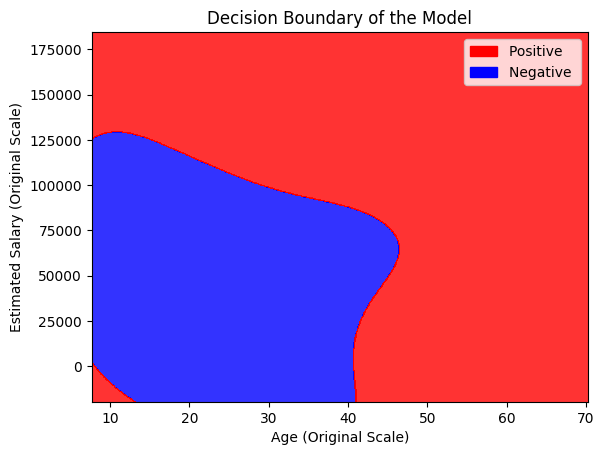

In [382]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler
import matplotlib.patches as mpatches

# Select the first two features for visualization
X_vis = X_train[:, :2]

# Define meshgrid range
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class labels for all points in the meshgrid
Z = best_svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predicted values to match the meshgrid shape
Z = Z.reshape(xx.shape)

# Apply inverse scaling to meshgrid points
xx_inv = sc.inverse_transform(np.c_[xx.ravel(), np.zeros_like(xx.ravel())])[:, 0].reshape(xx.shape)
yy_inv = sc.inverse_transform(np.c_[np.zeros_like(yy.ravel()), yy.ravel()])[:, 1].reshape(yy.shape)

# Inverse scaling to training data points
X_vis_inv = sc.inverse_transform(X_vis)

# Define custom colormap with discrete colors for blue and red
custom_cmap = ListedColormap(['blue', 'red'])

# Plot contour plot with custom colormap
plt.contourf(xx_inv, yy_inv, Z, alpha=0.8, cmap=custom_cmap)

# Plot data points with original scale after inverse scaling
# plt.scatter(X_vis_inv[y_train == 0, 0], X_vis_inv[y_train == 0, 1], c='blue', label="Negative", s=20, edgecolors='k')
# plt.scatter(X_vis_inv[y_train == 1, 0], X_vis_inv[y_train == 1, 1], c='red', label="Positive", s=20, edgecolors='k')


# Set x and y limits according to the reversed scale
plt.xlim(xx_inv.min(), xx_inv.max())
plt.ylim(yy_inv.min(), yy_inv.max())

# Add legend for colormap areas
patch1 = mpatches.Patch(color='blue', label='Negative ')
patch2 = mpatches.Patch(color='red', label='Positive ')
plt.legend(handles=[patch2, patch1], loc='upper right')

plt.xlabel('Age (Original Scale)')
plt.ylabel('Estimated Salary (Original Scale)')
plt.title('Decision Boundary of the Model')
# plt.legend(loc='upper right')
plt.show()

## Decision Tree Classifier

In [383]:
# Import necessary library
from sklearn.tree import DecisionTreeClassifier

# Define parameter grid
param_grid = {'max_depth': [None, 5, 10, 15, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Initialize DecisionTreeClassifier model
dt = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score: 0.86875


In [384]:
# Make predictions with the best model
best_dt= grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9125


In [385]:
# Make predictions on the training data
y_train_pred = best_dt.predict(X_train)

# Calculate confusion matrix for training data
cm_train = confusion_matrix(y_train, y_train_pred)
print("confusion matrix for training data:")
print(cm_train)

# Calculate confusion matrix for testing data
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix for testing data:")
print(cm)

confusion matrix for training data:
[[188  11]
 [ 12 109]]
confusion matrix for testing data:
[[55  3]
 [ 4 18]]


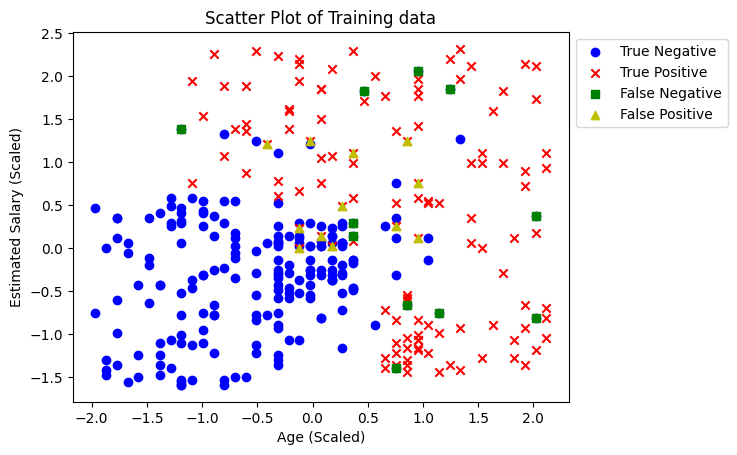

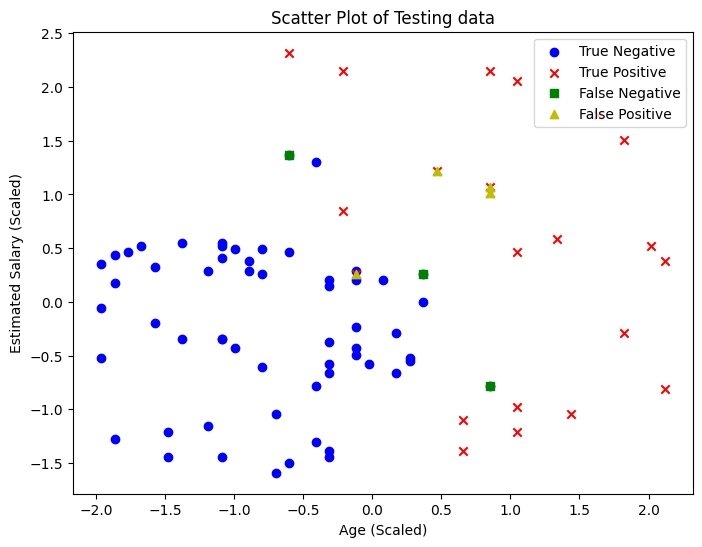

In [386]:
# Scatter plot for training data
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='b', marker='o', label='True Negative')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='r', marker='x', label='True Positive')
plt.scatter(X_train[(y_train != y_train_pred) & (y_train == 0)][:, 0], X_train[(y_train != y_train_pred) & (y_train == 0)][:, 1], c='g', marker='s', label='False Negative')
plt.scatter(X_train[(y_train != y_train_pred) & (y_train == 1)][:, 0], X_train[(y_train != y_train_pred) & (y_train == 1)][:, 1], c='y', marker='^', label='False Positive')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Age (Scaled)')
plt.ylabel('Estimated Salary (Scaled)')
plt.title('Scatter Plot of Training data')


# Show plot
plt.show()

# Define labels for confusion matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Show plot
plt.show()

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], c='b', marker='o', label='True Negative')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], c='r', marker='x', label='True Positive')
plt.scatter(X_test[(y_test != y_pred) & (y_test == 0)][:, 0], X_test[(y_test != y_pred) & (y_test == 0)][:, 1], c='g', marker='s', label='False Negative')
plt.scatter(X_test[(y_test != y_pred) & (y_test == 1)][:, 0], X_test[(y_test != y_pred) & (y_test == 1)][:, 1], c='y', marker='^', label='False Positive')

plt.title('Scatter Plot of Testing data')
plt.xlabel('Age (Scaled)')
plt.ylabel('Estimated Salary (Scaled)')
plt.legend(loc='upper right')

# Show plot
plt.show()


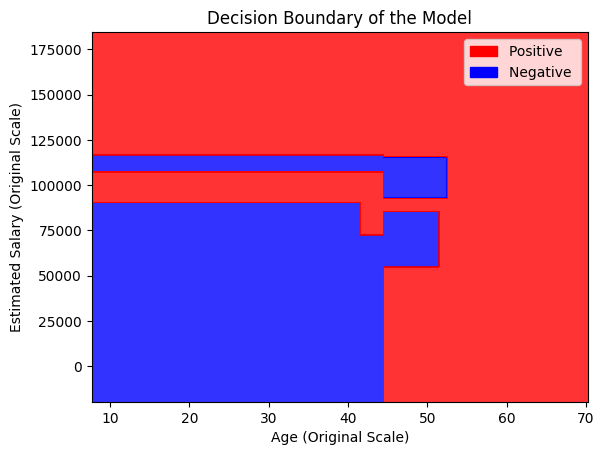

In [387]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler
import matplotlib.patches as mpatches

# Select the first two features for visualization
X_vis = X_train[:, :2]

# Define meshgrid range
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class labels for all points in the meshgrid
Z = best_dt.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predicted values to match the meshgrid shape
Z = Z.reshape(xx.shape)

# Apply inverse scaling to meshgrid points
xx_inv = sc.inverse_transform(np.c_[xx.ravel(), np.zeros_like(xx.ravel())])[:, 0].reshape(xx.shape)
yy_inv = sc.inverse_transform(np.c_[np.zeros_like(yy.ravel()), yy.ravel()])[:, 1].reshape(yy.shape)

# Inverse scaling to training data points
X_vis_inv = sc.inverse_transform(X_vis)

# Define custom colormap with discrete colors for blue and red
custom_cmap = ListedColormap(['blue', 'red'])

# Plot contour plot with custom colormap
plt.contourf(xx_inv, yy_inv, Z, alpha=0.8, cmap=custom_cmap)

# Plot data points with original scale after inverse scaling
# plt.scatter(X_vis_inv[y_train == 0, 0], X_vis_inv[y_train == 0, 1], c='blue', label="Negative", s=20, edgecolors='k')
# plt.scatter(X_vis_inv[y_train == 1, 0], X_vis_inv[y_train == 1, 1], c='red', label="Positive", s=20, edgecolors='k')


# Set x and y limits according to the reversed scale
plt.xlim(xx_inv.min(), xx_inv.max())
plt.ylim(yy_inv.min(), yy_inv.max())

# Add legend for colormap areas
patch1 = mpatches.Patch(color='blue', label='Negative ')
patch2 = mpatches.Patch(color='red', label='Positive ')
plt.legend(handles=[patch2, patch1], loc='upper right')

plt.xlabel('Age (Original Scale)')
plt.ylabel('Estimated Salary (Original Scale)')
plt.title('Decision Boundary of the Model')
# plt.legend(loc='upper right')
plt.show()

## Random Forest

In [388]:
# Import necessary library
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],}

# Initialize RandomForestClassifier model
RF= RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'n_estimators': 200}
Best Score: 0.896875


In [389]:
# Make predictions with the best model
best_RF = grid_search.best_estimator_
y_pred = best_RF.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9125


In [390]:
# Make predictions on the training data
y_train_pred = best_RF.predict(X_train)

# Calculate confusion matrix for training data
cm_train = confusion_matrix(y_train, y_train_pred)
print("confusion matrix for training data:")
print(cm_train)

# Calculate confusion matrix for testing data
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix for testing data:")
print(cm)

confusion matrix for training data:
[[199   0]
 [  1 120]]
confusion matrix for testing data:
[[54  4]
 [ 3 19]]


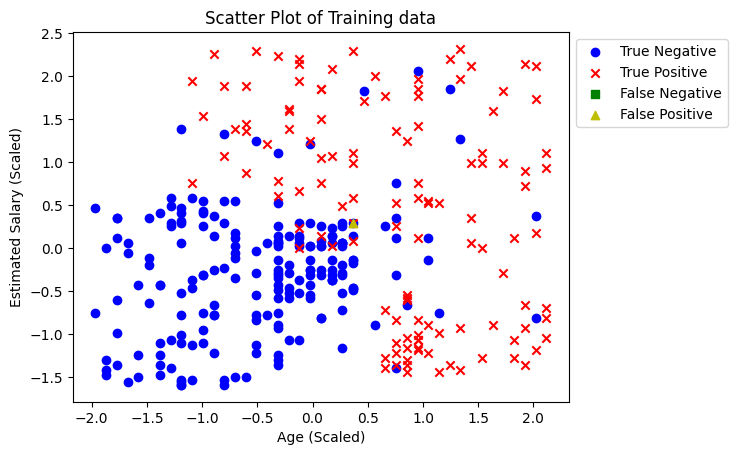

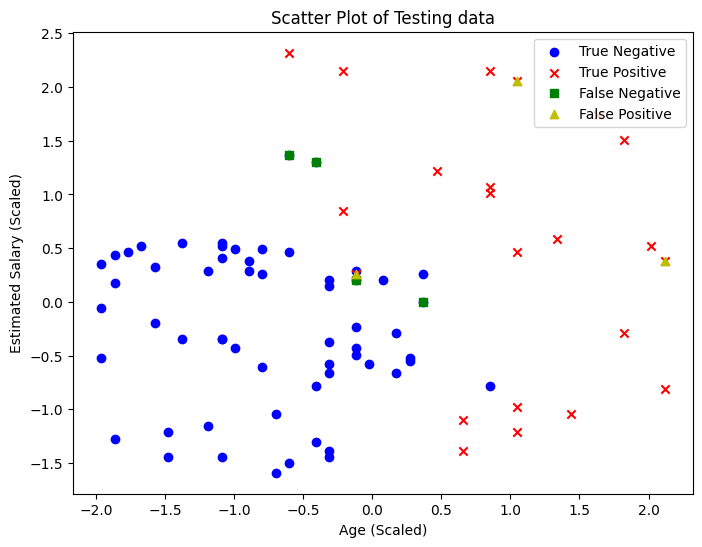

In [391]:
# Scatter plot for training data
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='b', marker='o', label='True Negative')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='r', marker='x', label='True Positive')
plt.scatter(X_train[(y_train != y_train_pred) & (y_train == 0)][:, 0], X_train[(y_train != y_train_pred) & (y_train == 0)][:, 1], c='g', marker='s', label='False Negative')
plt.scatter(X_train[(y_train != y_train_pred) & (y_train == 1)][:, 0], X_train[(y_train != y_train_pred) & (y_train == 1)][:, 1], c='y', marker='^', label='False Positive')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Age (Scaled)')
plt.ylabel('Estimated Salary (Scaled)')
plt.title('Scatter Plot of Training data')

# Show plot
plt.show()

# Define labels for confusion matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Show plot
plt.show()

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], c='b', marker='o', label='True Negative')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], c='r', marker='x', label='True Positive')
plt.scatter(X_test[(y_test != y_pred) & (y_test == 0)][:, 0], X_test[(y_test != y_pred) & (y_test == 0)][:, 1], c='g', marker='s', label='False Negative')
plt.scatter(X_test[(y_test != y_pred) & (y_test == 1)][:, 0], X_test[(y_test != y_pred) & (y_test == 1)][:, 1], c='y', marker='^', label='False Positive')

plt.title('Scatter Plot of Testing data')
plt.xlabel('Age (Scaled)')
plt.ylabel('Estimated Salary (Scaled)')
plt.legend(loc='upper right')

# Show plot
plt.show()


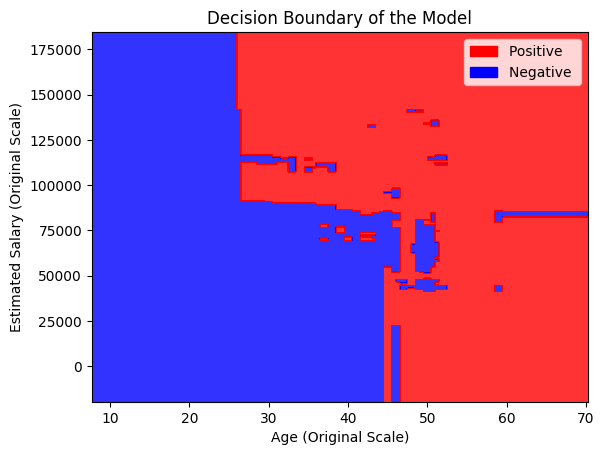

In [392]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler
import matplotlib.patches as mpatches

# Select the first two features for visualization
X_vis = X_train[:, :2]

# Define meshgrid range
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class labels for all points in the meshgrid
Z = best_RF.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predicted values to match the meshgrid shape
Z = Z.reshape(xx.shape)

# Apply inverse scaling to meshgrid points
xx_inv = sc.inverse_transform(np.c_[xx.ravel(), np.zeros_like(xx.ravel())])[:, 0].reshape(xx.shape)
yy_inv = sc.inverse_transform(np.c_[np.zeros_like(yy.ravel()), yy.ravel()])[:, 1].reshape(yy.shape)

# Inverse scaling to training data points
X_vis_inv = sc.inverse_transform(X_vis)

# Define custom colormap with discrete colors for blue and red
custom_cmap = ListedColormap(['blue', 'red'])

# Plot contour plot with custom colormap
plt.contourf(xx_inv, yy_inv, Z, alpha=0.8, cmap=custom_cmap)

# Plot data points with original scale after inverse scaling
# plt.scatter(X_vis_inv[y_train == 0, 0], X_vis_inv[y_train == 0, 1], c='blue', label="Negative", s=20, edgecolors='k')
# plt.scatter(X_vis_inv[y_train == 1, 0], X_vis_inv[y_train == 1, 1], c='red', label="Positive", s=20, edgecolors='k')


# Set x and y limits according to the reversed scale
plt.xlim(xx_inv.min(), xx_inv.max())
plt.ylim(yy_inv.min(), yy_inv.max())

# Add legend for colormap areas
patch1 = mpatches.Patch(color='blue', label='Negative ')
patch2 = mpatches.Patch(color='red', label='Positive ')
plt.legend(handles=[patch2, patch1], loc='upper right')

plt.xlabel('Age (Original Scale)')
plt.ylabel('Estimated Salary (Original Scale)')
plt.title('Decision Boundary of the Model')
# plt.legend(loc='upper right')
plt.show()

## Naive Bayes Classifier

In [393]:
# Import necessary library
from sklearn.naive_bayes import GaussianNB

# Define parameter grid (No hyperparameters to tune for GaussianNB)
param_grid = {}

# Initialize GaussianNB model
nb = GaussianNB()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {}
Best Score: 0.88125


In [394]:
# Make predictions with the best model
best_nb = grid_search.best_estimator_
y_pred = best_nb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9125


In [395]:
# Make predictions on the training data
y_train_pred = best_nb.predict(X_train)

# Calculate confusion matrix for training data
cm_train = confusion_matrix(y_train, y_train_pred)
print("confusion matrix for training data:")
print(cm_train)

# Calculate confusion matrix for testing data
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix for testing data:")
print(cm)

confusion matrix for training data:
[[183  16]
 [ 21 100]]
confusion matrix for testing data:
[[55  3]
 [ 4 18]]


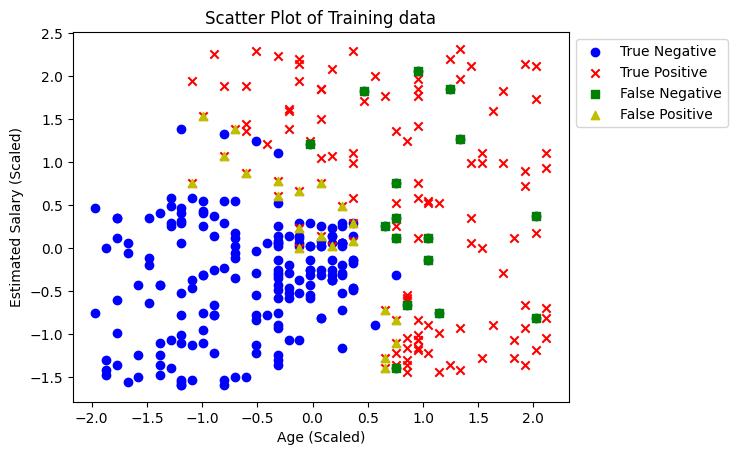

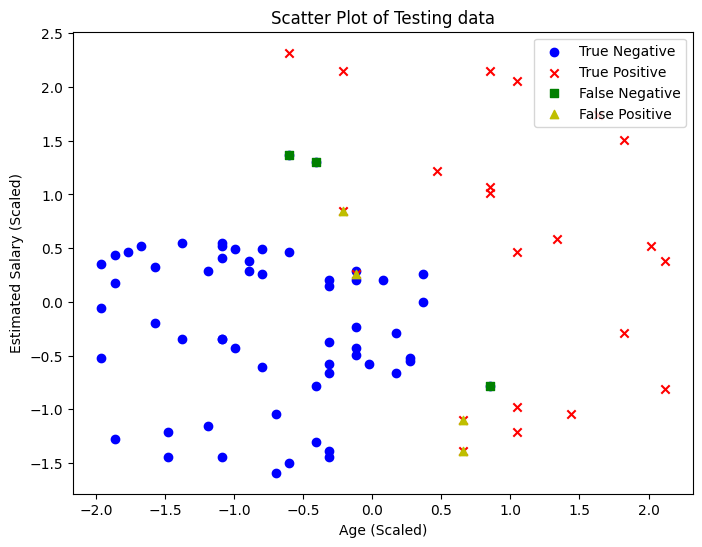

In [396]:
# Scatter plot for training data
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='b', marker='o', label='True Negative')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='r', marker='x', label='True Positive')
plt.scatter(X_train[(y_train != y_train_pred) & (y_train == 0)][:, 0], X_train[(y_train != y_train_pred) & (y_train == 0)][:, 1], c='g', marker='s', label='False Negative')
plt.scatter(X_train[(y_train != y_train_pred) & (y_train == 1)][:, 0], X_train[(y_train != y_train_pred) & (y_train == 1)][:, 1], c='y', marker='^', label='False Positive')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Age (Scaled)')
plt.ylabel('Estimated Salary (Scaled)')
plt.title('Scatter Plot of Training data')

# Show plot
plt.show()

# Define labels for confusion matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Show plot
plt.show()

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], c='b', marker='o', label='True Negative')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], c='r', marker='x', label='True Positive')
plt.scatter(X_test[(y_test != y_pred) & (y_test == 0)][:, 0], X_test[(y_test != y_pred) & (y_test == 0)][:, 1], c='g', marker='s', label='False Negative')
plt.scatter(X_test[(y_test != y_pred) & (y_test == 1)][:, 0], X_test[(y_test != y_pred) & (y_test == 1)][:, 1], c='y', marker='^', label='False Positive')

plt.title('Scatter Plot of Testing data')
plt.xlabel('Age (Scaled)')
plt.ylabel('Estimated Salary (Scaled)')
plt.legend(loc='upper right')

# Show plot
plt.show()


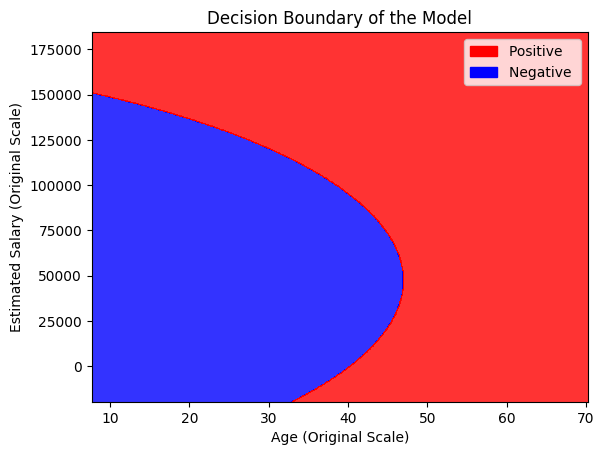

In [397]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler
import matplotlib.patches as mpatches

# Select the first two features for visualization
X_vis = X_train[:, :2]

# Define meshgrid range
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class labels for all points in the meshgrid
Z = best_nb.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predicted values to match the meshgrid shape
Z = Z.reshape(xx.shape)

# Apply inverse scaling to meshgrid points
xx_inv = sc.inverse_transform(np.c_[xx.ravel(), np.zeros_like(xx.ravel())])[:, 0].reshape(xx.shape)
yy_inv = sc.inverse_transform(np.c_[np.zeros_like(yy.ravel()), yy.ravel()])[:, 1].reshape(yy.shape)

# Inverse scaling to training data points
X_vis_inv = sc.inverse_transform(X_vis)

# Define custom colormap with discrete colors for blue and red
custom_cmap = ListedColormap(['blue', 'red'])

# Plot contour plot with custom colormap
plt.contourf(xx_inv, yy_inv, Z, alpha=0.8, cmap=custom_cmap)

# Plot data points with original scale after inverse scaling
# plt.scatter(X_vis_inv[y_train == 0, 0], X_vis_inv[y_train == 0, 1], c='blue', label="Negative", s=20, edgecolors='k')
# plt.scatter(X_vis_inv[y_train == 1, 0], X_vis_inv[y_train == 1, 1], c='red', label="Positive", s=20, edgecolors='k')


# Set x and y limits according to the reversed scale
plt.xlim(xx_inv.min(), xx_inv.max())
plt.ylim(yy_inv.min(), yy_inv.max())

# Add legend for colormap areas
patch1 = mpatches.Patch(color='blue', label='Negative ')
patch2 = mpatches.Patch(color='red', label='Positive ')
plt.legend(handles=[patch2, patch1], loc='upper right')

plt.xlabel('Age (Original Scale)')
plt.ylabel('Estimated Salary (Original Scale)')
plt.title('Decision Boundary of the Model')
# plt.legend(loc='upper right')
plt.show()

## XGBoost

In [398]:
# Import necessary library
from xgboost import XGBClassifier

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [10, 20, 30],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

# Initialize XGBClassifier model
xg = XGBClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 20, 'subsample': 0.5}
Best Score: 0.909375


In [399]:
# Make predictions with the best model
best_xg = grid_search.best_estimator_
y_pred = best_xg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.95


In [400]:
# Make predictions on the training data
y_train_pred = best_xg.predict(X_train)

# Calculate confusion matrix for training data
cm_train = confusion_matrix(y_train, y_train_pred)
print("confusion matrix for training data:")
print(cm_train)

# Calculate confusion matrix for testing data
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix for testing data:")
print(cm)

confusion matrix for training data:
[[182  17]
 [  8 113]]
confusion matrix for testing data:
[[55  3]
 [ 1 21]]


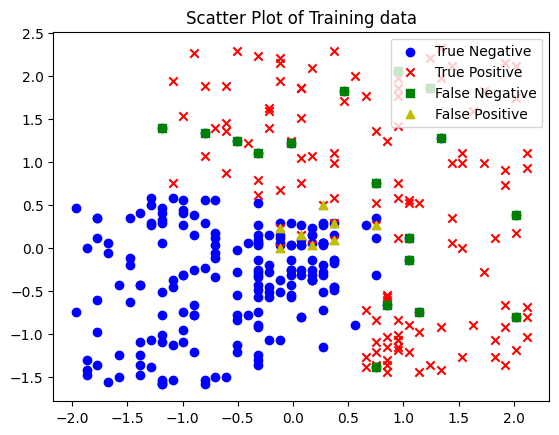

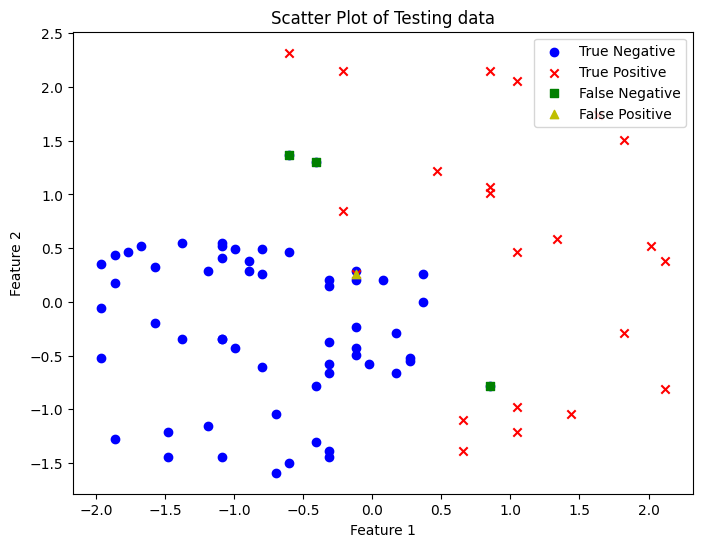

In [306]:
# Scatter plot for training data
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='b', marker='o', label='True Negative')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='r', marker='x', label='True Positive')
plt.scatter(X_train[(y_train != y_train_pred) & (y_train == 0)][:, 0], X_train[(y_train != y_train_pred) & (y_train == 0)][:, 1], c='g', marker='s', label='False Negative')
plt.scatter(X_train[(y_train != y_train_pred) & (y_train == 1)][:, 0], X_train[(y_train != y_train_pred) & (y_train == 1)][:, 1], c='y', marker='^', label='False Positive')


plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Age (Scaled)')
plt.ylabel('Estimated Salary (Scaled)')
plt.title('Scatter Plot of Training data')

# Show plot
plt.show()

# Define labels for confusion matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Show plot
plt.show()

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], c='b', marker='o', label='True Negative')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], c='r', marker='x', label='True Positive')
plt.scatter(X_test[(y_test != y_pred) & (y_test == 0)][:, 0], X_test[(y_test != y_pred) & (y_test == 0)][:, 1], c='g', marker='s', label='False Negative')
plt.scatter(X_test[(y_test != y_pred) & (y_test == 1)][:, 0], X_test[(y_test != y_pred) & (y_test == 1)][:, 1], c='y', marker='^', label='False Positive')

plt.title('Scatter Plot of Testing data')
plt.xlabel('Age (Scaled)')
plt.ylabel('Estimated Salary (Scaled)')
plt.legend(loc='upper right')

# Show plot
plt.show()


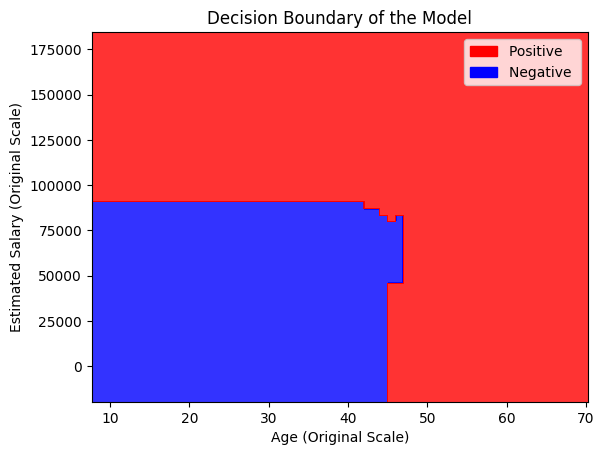

In [401]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler
import matplotlib.patches as mpatches

# Select the first two features for visualization
X_vis = X_train[:, :2]

# Define meshgrid range
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class labels for all points in the meshgrid
Z = best_xg.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predicted values to match the meshgrid shape
Z = Z.reshape(xx.shape)

# Apply inverse scaling to meshgrid points
xx_inv = sc.inverse_transform(np.c_[xx.ravel(), np.zeros_like(xx.ravel())])[:, 0].reshape(xx.shape)
yy_inv = sc.inverse_transform(np.c_[np.zeros_like(yy.ravel()), yy.ravel()])[:, 1].reshape(yy.shape)

# Inverse scaling to training data points
X_vis_inv = sc.inverse_transform(X_vis)

# Define custom colormap with discrete colors for blue and red
custom_cmap = ListedColormap(['blue', 'red'])

# Plot contour plot with custom colormap
plt.contourf(xx_inv, yy_inv, Z, alpha=0.8, cmap=custom_cmap)

# Plot data points with original scale after inverse scaling
# plt.scatter(X_vis_inv[y_train == 0, 0], X_vis_inv[y_train == 0, 1], c='blue', label="Negative", s=20, edgecolors='k')
# plt.scatter(X_vis_inv[y_train == 1, 0], X_vis_inv[y_train == 1, 1], c='red', label="Positive", s=20, edgecolors='k')


# Set x and y limits according to the reversed scale
plt.xlim(xx_inv.min(), xx_inv.max())
plt.ylim(yy_inv.min(), yy_inv.max())

# Add legend for colormap areas
patch1 = mpatches.Patch(color='blue', label='Negative ')
patch2 = mpatches.Patch(color='red', label='Positive ')
plt.legend(handles=[patch2, patch1], loc='upper right')

plt.xlabel('Age (Original Scale)')
plt.ylabel('Estimated Salary (Original Scale)')
plt.title('Decision Boundary of the Model')
# plt.legend(loc='upper right')
plt.show()

## CatBoost

In [402]:
# Import necessary library
from catboost import CatBoostClassifier

# Define parameter grid
param_grid = {
    'depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'iterations': [10, 20, 30],
    'l2_leaf_reg': [1, 3, 5],
    'subsample': [0.5, 0.7, 1.0],
}

# Initialize CatBoostClassifier model
cb = CatBoostClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=cb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)



0:	learn: 0.6354164	total: 561us	remaining: 5.05ms
1:	learn: 0.5898291	total: 912us	remaining: 3.65ms
2:	learn: 0.5501843	total: 1.17ms	remaining: 2.73ms
3:	learn: 0.5129227	total: 2.18ms	remaining: 3.27ms
4:	learn: 0.4800794	total: 2.65ms	remaining: 2.65ms
5:	learn: 0.4524924	total: 3.18ms	remaining: 2.12ms
6:	learn: 0.4280678	total: 3.68ms	remaining: 1.58ms
7:	learn: 0.4099388	total: 4.18ms	remaining: 1.04ms
8:	learn: 0.3936987	total: 4.69ms	remaining: 521us
9:	learn: 0.3790158	total: 5.21ms	remaining: 0us
Best Parameters: {'depth': 5, 'iterations': 10, 'l2_leaf_reg': 1, 'learning_rate': 0.1, 'subsample': 1.0}
Best Score: 0.909375


In [403]:
# Make predictions with the best model
best_cb = grid_search.best_estimator_
y_pred = best_cb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.95


In [404]:
# Make predictions on the training data
y_train_pred = best_cb.predict(X_train)

# Calculate confusion matrix for training data
cm_train = confusion_matrix(y_train, y_train_pred)
print("confusion matrix for training data:")
print(cm_train)

# Calculate confusion matrix for testing data
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix for testing data:")
print(cm)

confusion matrix for training data:
[[179  20]
 [  8 113]]
confusion matrix for testing data:
[[55  3]
 [ 1 21]]


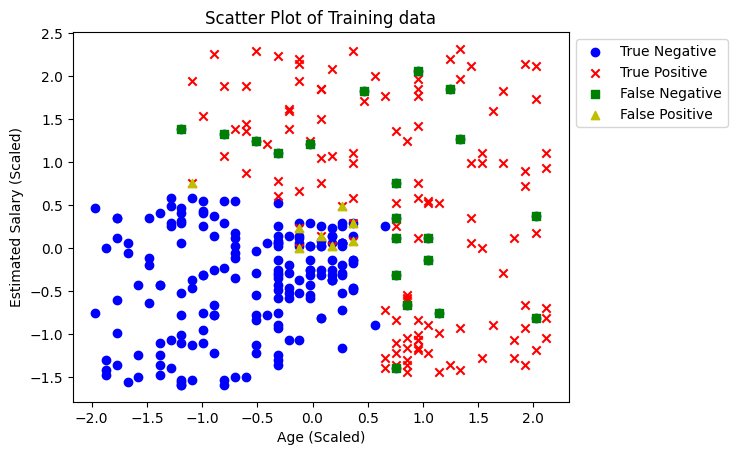

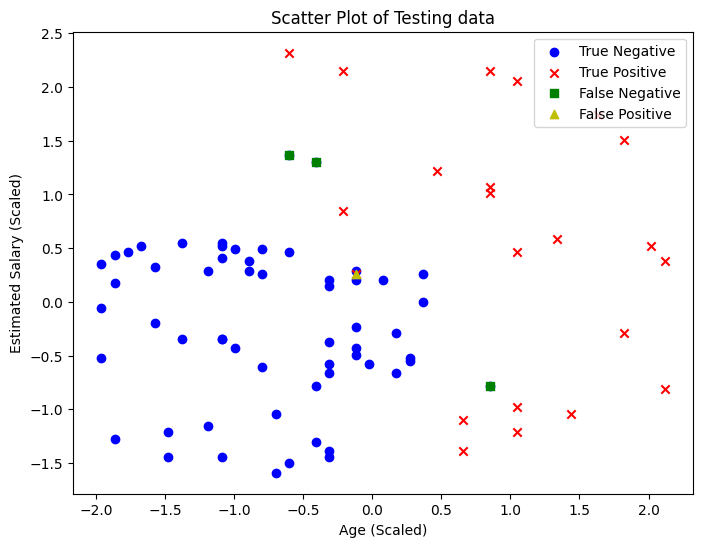

In [405]:
# Scatter plot for training data
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='b', marker='o', label='True Negative')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='r', marker='x', label='True Positive')
plt.scatter(X_train[(y_train != y_train_pred) & (y_train == 0)][:, 0], X_train[(y_train != y_train_pred) & (y_train == 0)][:, 1], c='g', marker='s', label='False Negative')
plt.scatter(X_train[(y_train != y_train_pred) & (y_train == 1)][:, 0], X_train[(y_train != y_train_pred) & (y_train == 1)][:, 1], c='y', marker='^', label='False Positive')


plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Age (Scaled)')
plt.ylabel('Estimated Salary (Scaled)')
plt.title('Scatter Plot of Training data')

# Show plot
plt.show()

# Define labels for confusion matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Show plot
plt.show()

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], c='b', marker='o', label='True Negative')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], c='r', marker='x', label='True Positive')
plt.scatter(X_test[(y_test != y_pred) & (y_test == 0)][:, 0], X_test[(y_test != y_pred) & (y_test == 0)][:, 1], c='g', marker='s', label='False Negative')
plt.scatter(X_test[(y_test != y_pred) & (y_test == 1)][:, 0], X_test[(y_test != y_pred) & (y_test == 1)][:, 1], c='y', marker='^', label='False Positive')

plt.title('Scatter Plot of Testing data')
plt.xlabel('Age (Scaled)')
plt.ylabel('Estimated Salary (Scaled)')
plt.legend(loc='upper right')

# Show plot
plt.show()


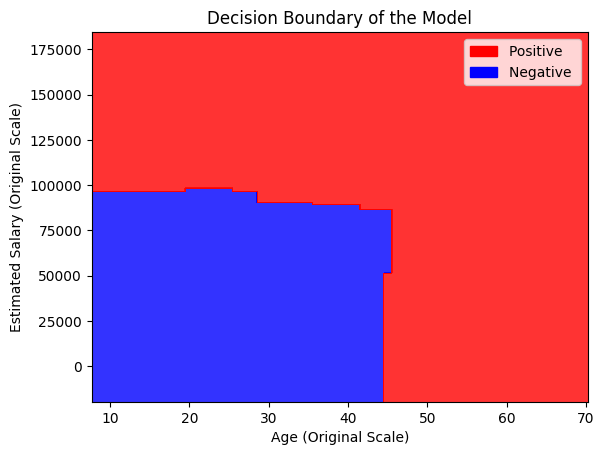

In [407]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler
import matplotlib.patches as mpatches

# Select the first two features for visualization
X_vis = X_train[:, :2]

# Define meshgrid range
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class labels for all points in the meshgrid
Z = best_cb.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predicted values to match the meshgrid shape
Z = Z.reshape(xx.shape)

# Apply inverse scaling to meshgrid points
xx_inv = sc.inverse_transform(np.c_[xx.ravel(), np.zeros_like(xx.ravel())])[:, 0].reshape(xx.shape)
yy_inv = sc.inverse_transform(np.c_[np.zeros_like(yy.ravel()), yy.ravel()])[:, 1].reshape(yy.shape)

# Inverse scaling to training data points
X_vis_inv = sc.inverse_transform(X_vis)

# Define custom colormap with discrete colors for blue and red
custom_cmap = ListedColormap(['blue', 'red'])

# Plot contour plot with custom colormap
plt.contourf(xx_inv, yy_inv, Z, alpha=0.8, cmap=custom_cmap)

# Plot data points with original scale after inverse scaling
# plt.scatter(X_vis_inv[y_train == 0, 0], X_vis_inv[y_train == 0, 1], c='blue', label="Negative", s=20, edgecolors='k')
# plt.scatter(X_vis_inv[y_train == 1, 0], X_vis_inv[y_train == 1, 1], c='red', label="Positive", s=20, edgecolors='k')


# Set x and y limits according to the reversed scale
plt.xlim(xx_inv.min(), xx_inv.max())
plt.ylim(yy_inv.min(), yy_inv.max())

# Add legend for colormap areas
patch1 = mpatches.Patch(color='blue', label='Negative ')
patch2 = mpatches.Patch(color='red', label='Positive ')
plt.legend(handles=[patch2, patch1], loc='upper right')

plt.xlabel('Age (Original Scale)')
plt.ylabel('Estimated Salary (Original Scale)')
plt.title('Decision Boundary of the Model')
# plt.legend(loc='upper right')
plt.show()